## SMS Spam Collection 📱🤖📲
- [kaggle link](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?datasetId=483&sortBy=voteCount)

<br/>

### 📃 Context
- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam ressearch. It contains one set of SMS messages in English of 5m574 messages, tagged acording being ham (legitimate) or spam.

### 📌 Goals

- In this notebook I will discuss a overview of the basics of Natural Lagnuage Processing, which basically consists of combining machine learning techniques with text and build a prediction model that will accurately classify which texts are spam.

<br/>

### 📝 Agenda

In this kernel I explore some common techniques of NLP like:

1. Representing text as numerical data
2. Reading a text-based dataset into pandas
3. Vectorize our dataset
4. Building and evaluating a model
5. Comparing models
6. Examining a model for further insight

<br/>

### 🗂️ Table of Contents

1. IMPORTING LIBRARIES
2. LOADING DATA
3. DATA EXPLORATION
  - 3.1 FEATURE ENGINEERING
  - 3.2 DATA VISUALIZATION
4. DATA PREPROCESSING
  - 4.1 COUNTING NORMALIZATION
  - 4.2 VECTORIZATION
  - 4.3 TF-IDF?
5. MODEL TRAINING
6. MODEL EVALUATION
7. TRAIN TEST SPLIT
8. DATA PIPELINE

### Reference

- [Natural Language Processing (NLP)🧾for Beginners](https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners)
- [Spam Or Ham: SMS Classifier](https://www.kaggle.com/code/karnikakapoor/spam-or-ham-sms-classifier)
- [Natural Language Processing with Python](https://www.kaggle.com/code/ravichaubey1506/natural-language-processing-with-python)
- [SMS: Spam or Ham (Beginner)](https://www.kaggle.com/code/dejavu23/sms-spam-or-ham-beginner)

In [42]:
# google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# change directory
%cd /content/drive/MyDrive/kaggle/SMS_Spam_Collection

# decompress the file
# !unzip archive.zip

/content/drive/MyDrive/kaggle/SMS_Spam_Collection


## 1. Import libraries

In [44]:
#Importing all the libraries to be used
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

## 2. Loading Data

In [45]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Get an overview of the dataset.
- Columns 2, 3, 4 contains no important data and can be deleted.
- Also, we rename column v1 as 'label' and v2 as 'text'.

In [47]:
# Dropping the redundent looking collumns (for this project)
data = data.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis = 1)

# Renaming the columns because I feel fancy today 
data.rename(columns = {"v1":"target", "v2":"text"}, inplace = True)

In [48]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
data.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [50]:
data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

#### Disstribution of the target variable
- The dataset consists of 5,574 messages in English.
- The data is designated as being ham or spam.
- The dataset contains 4,825 ham and 747 spam messages.
- For both classes, some messages appear more than once (common phrases, etc.).


## 3. Data Exploration

### 3.1 Feature Engineering

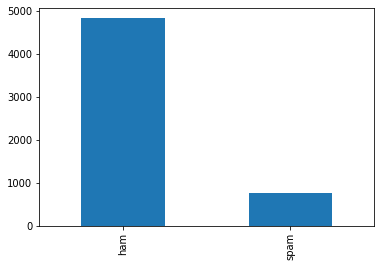

In [53]:
data.target.value_counts().plot.bar()

In [52]:
data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

- Note: From the above countplot the data imbalance is quite evident.

### Add numerical label for spam

- Target must be numerical for ML classification models

In [54]:
data['spam'] = data['target'].map({'spam':1, 'ham':0}).astype(int)
data.head(15)

,target,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


- Add a new column 'spam' for classifying label. The label of spam is `1` and the label of ham is `0`.
  - `spam` : `1`
  - `ham` : `0`

### Add feature: length of message

In [55]:
data['length'] = data['text'].apply(len)
data.head()

,target,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


### 3.2 Data Visualization

(-40.0, 950.0)

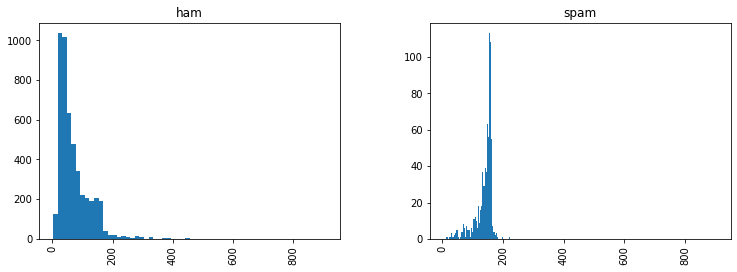

In [58]:
data.hist(column='length', by='target', bins=60, figsize=(12,4))
plt.xlim(-40, 950)

Looks like spam messages are generally longer than ham messages: <br/>
Bulk of ham has length below 100, for spam it is above 100. <br/>

In [56]:
data['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

Max is 910 characters, let's use masking to find this message:

In [59]:
data[data['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Length Class'),
 Text(0.5, 1.0, 'SPAM')]

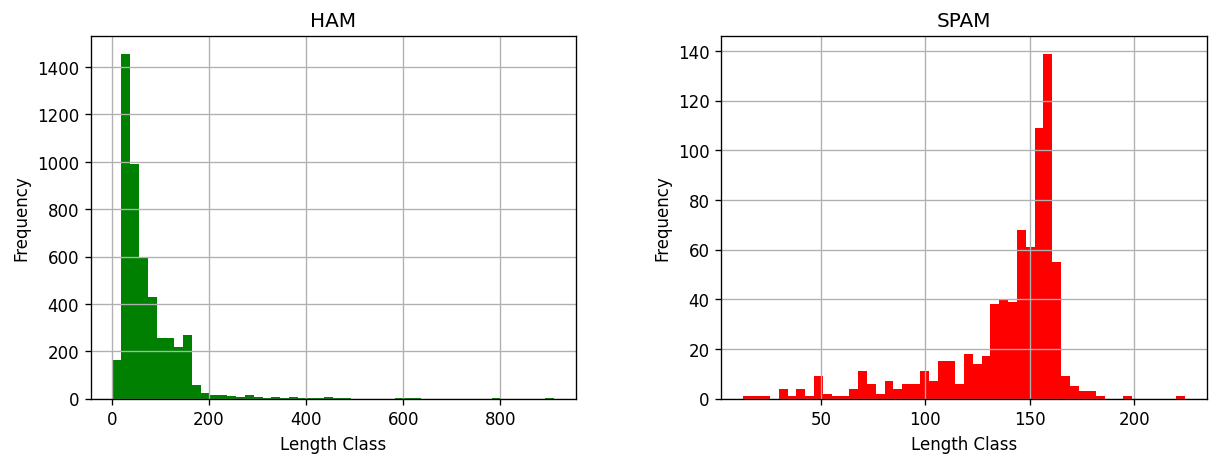

In [60]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

data[data['target']=='ham'].hist(column='length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'HAM')
data[data['target']=='spam'].hist(column='length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'SPAM')

Very interesting!

Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters.

## 4. Data Preprocessing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In [65]:
from nltk.corpus import stopwords
import string

In [66]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Here is the original DataFrame again:

In [67]:
data.head()

,target,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Now let's "tokenize" these messages. **Tokenization** is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

In [69]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [70]:
# Check to make sure its working
data['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

### 4-1 Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as Stemming or distinguishing by part of speech.

NLTK has lots of built-in tools and great documentation on a lot of these methods.

### 4-2 Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

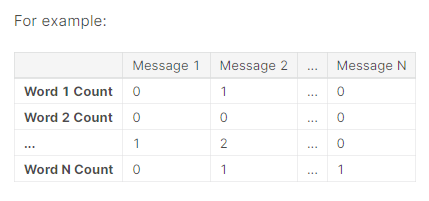

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11304


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [74]:
data4 = data['text'][3]
print(data4)

U dun say so early hor... U c already then say...


Now let's see its vector representation:

In [75]:
bow4 = bow_transformer.transform([data4])
print(bow4)
print(bow4.shape)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [78]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

VALUED
shades


Now we can use `.transform` on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [79]:
data_bow = bow_transformer.transform(data['text'])

In [80]:
print('Shape of Sparse Matrix: ', data_bow.shape)
print('Amount of Non-Zero occurences: ', data_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of Non-Zero occurences:  50193


In [81]:
sparsity = (100.0 * data_bow.nnz / (data_bow.shape[0] * data_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


### 4-3. What is TF-IDF?

**TF-IDF** stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [83]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.288863056423095
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [84]:
data_tfidf = tfidf_transformer.transform(data_bow)
print(data_tfidf.shape)

(5572, 11304)


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

## 5. Model Training
We'll be using scikit-learn here, choosing the Naive Bayes classifier to start with:

In [85]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(data_tfidf, data['target'])

Let's try classifying our single random message and checking how we do:

In [87]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', data.target[3])

predicted: ham
expected: ham


Fantastic! We've developed a model that can attempt to predict spam vs ham classification!

## 6. Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [88]:
all_predictions = spam_detect_model.predict(data_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


We can use SciKit Learn's built-in classification report, which returns precision, recall, f1-score, and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

In [89]:
from sklearn.metrics import classification_report
print (classification_report(data['target'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

<br/>

In the above "evaluation", we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

<br/>

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## 7. Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data['text'], data['target'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## 8. Data Pipeline
Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [91]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [92]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd64ab3e0e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [93]:
predictions = pipeline.predict(msg_test)

In [94]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1005
        spam       0.71      1.00      0.83       110

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here, and its vast expanse of topic could fill up several college courses! I encourage you to check out other resources on NLP!